# PROJETO FINAL DATA SCIENCE

## Previsão de Doenças Cardíacas

## I - Esposição do problema

Vários fatores influência em doeças cardiacas, são os níveis de colesterol, historico familiar, obesidade entre outros, prever 
e diagnosticar doenças cardiacas é um desafio que depende de fatores como exames, sitomas e sinais do paciente.Os problemas
cardíacos é visto como a doença mais mortal, pois o coração não é capaz de empurrar a quantidade necessaria de sangue para os
orgãos restante do corpo humano. Neste projeto vamos realizar uma tarefa de previsão de doenças cardíacas usando EDA e algoritimo de LogisticRegression, Rede Neural e SVM Support Vector Machine(“Support Vector Machine” (SVM) é um algoritmo de aprendizado de máquina supervisionado que pode ser usado para desafios de classificação ou regressão.
Seu foco maior é no treinamento e classificação de um dataset.



##  importação das bibliotecas

In [135]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics 
from keras.models import Sequential  # rede neural
from keras.layers import Dense
import theano
import keras
import tensorflow as tf
%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.optimizers import SGD


### II  -   Importação dos dados
###      Lendo os dados

In [13]:
df = pd.read_csv("heart.csv", sep=';')
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


##### Descriptografia em atributos da página da Web da fonte de dados:

1- idade - idade em anos

2- sexo - sexo (1 = masculino; 0 = feminino)

3- cp - tipo de dor torácica (1 = angina típica; 2 = angina atípica; 3 = dor não anginosa; 4 = assintomática)

4- trestbps - pressão arterial em repouso (em mm Hg na admissão ao hospital)

5- chol - soro colestoral em mg/dl, mior que 200 é ruim

6- fbs - glicemia em jejum > 120 mg/dl (1 = verdadeiro; 0 = falso)

7- restecg - resultados eletrocardiográficos de repouso (0 = normal; 1 = com ST-T; 2 = hipertrofia)

8- thalach - frequência cardíaca máxima atingida

9- exang - angina induzida pelo exercício (1 = sim; 0 = não)

10- oldpeak (pico antigo) - depressão do segmento ST induzida pelo exercício em relação ao repouso

11- slope (inclinação) - a inclinação do segmento ST do exercício de pico (1 = ascendente; 2 = plano; 3 = descendente)

12 - ca - número de vasos principais (0-3) coloridos por fluorosopia

13- thal - 1 = normal; 2 = defeito corrigido; 3 = defeito reversível


## III -  Preparação dos dados

##### Verificando entradas nulas no dataframe

In [14]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [15]:
df.shape

(303, 14)

In [16]:

print(df['target'].unique())
print(df['thal'].unique())

[1 0]
[1 2 3 0]


###### Aredondado os valores para duas casas decimais

In [17]:
pd.set_option("display.float", "{:.2f}".format)
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00
mean,54.37,0.68,0.97,131.62,246.26,0.15,0.53,149.65,0.33,1.04,1.40,0.73,2.31,0.54
std,9.08,0.47,1.03,17.54,51.83,0.36,0.53,22.91,0.47,1.16,0.62,1.02,0.61,0.50
min,29.00,0.00,0.00,94.00,126.00,0.00,0.00,71.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,47.50,0.00,0.00,120.00,211.00,0.00,0.00,133.50,0.00,0.00,1.00,0.00,2.00,0.00
50%,55.00,1.00,1.00,130.00,240.00,0.00,1.00,153.00,0.00,0.80,1.00,0.00,2.00,1.00
75%,61.00,1.00,2.00,140.00,274.50,0.00,1.00,166.00,1.00,1.60,2.00,1.00,3.00,1.00
max,77.00,1.00,3.00,200.00,564.00,1.00,2.00,202.00,1.00,6.20,2.00,4.00,3.00,1.00


### IV- Análise Exploratória

#### Age x oldpeak

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'oldpeak')

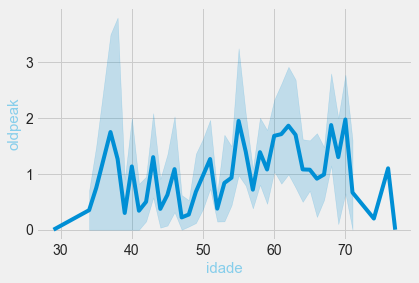

In [18]:
X = df["age"].values
Y = df["oldpeak"].values
line_plot = sns.lineplot(X,Y)
line_plot.set_xlabel("idade", fontsize = 15,color="skyblue")
line_plot.set_ylabel("oldpeak", fontsize = 15,color="skyblue")

### Observações do gráfico acima
- Pessoas entre 40 e 50 anos tem os batimentos menos elevado, já as 
pessoas entre 60 e 70 anos tem os batimentos mais alto


## Verificando quantidade pessoas com problemas cardíacos

Text(0.5, 21.200000000000003, 'target')

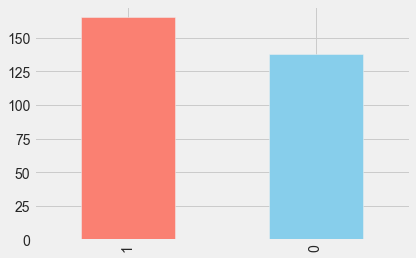

In [19]:
df.target.value_counts().plot(kind="bar", color=["salmon", "skyblue"]) 
line_plot.set_xlabel("target", fontsize = 15,color="skyblue")



#### Observações do gráfico acima
- Temos em aproximadamente 165 pessoas com problemas e 140 sem problemas cardiacos

### Verificando problemas cardíacos com sexo (F) (M)

Text(0.5, 21.200000000000003, 'sex')

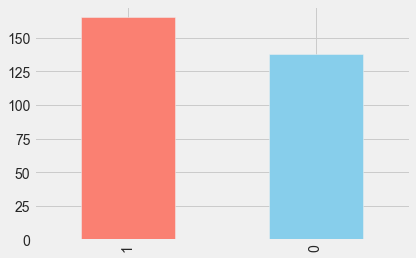

In [145]:
df.target.value_counts().plot(kind="bar", color=["salmon", "skyblue"]) 
line_plot.set_xlabel("sex", fontsize = 15,color="skyblue")



#### Observações do gráfico acima
- Problemas cardíacos acontece mais em pessoas do sexo Masculino

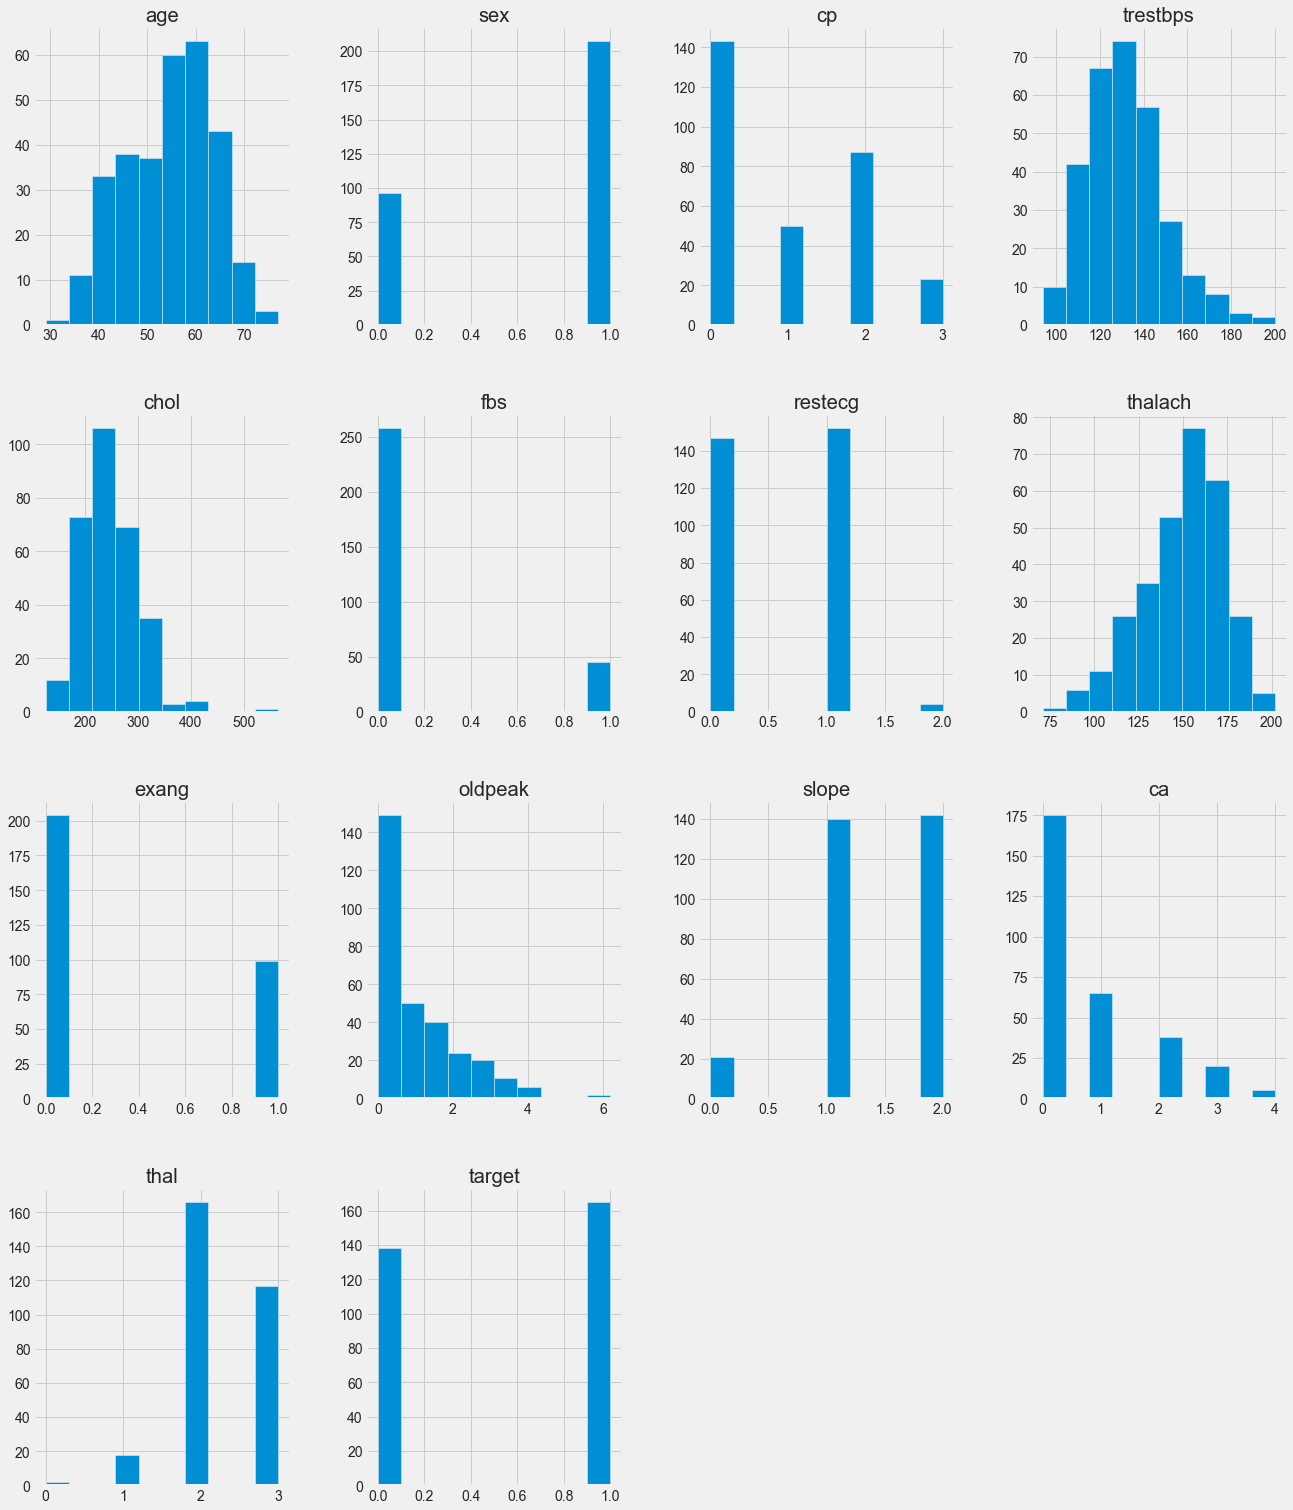

In [21]:
p = df.hist(figsize = (20,25))

#### Observações do gráfico acima:

- Age- A maioria das pessoas tem idade entre 55 e 65 anos.
- CP-(dor no peito) pessoas com dor toráxica com valores 1,2,3 são mais propensas a ter doenças cardíacas do que pessoas com cp0.
- trestbps- 9pressão em repouso) valores acima de 130  é preocupante.
- Chol- Soro colestoral maior que 200 é ruim.
- Fbs- A maioria das pessoas não tem glicemia alta.
- Thalach-  A maioria dos pacientes tiveram frequencia car´diaca entre 150 e 175 bpm.

- restecg- {resultados eletrocardiográficos de repouso}: Pessoas com um valor de 1 (relatando um ritmo cardíaco anormal, que pode variar de sintomas leves a problemas graves) têm maior probabilidade de ter doenças cardíacas.

- exang {angina induzida por exercício( a angina ocorre em resposta ao esforço e é aliviada durante o repouso.}: pessoas com valor 1 (SIM) são mais propensas a ter problemas cardíacos.

- ca {número de vasos principais (0-3) corados por fluoroscopia}: quanto mais circulação de sangue, melhor, então pessoas com ca igual a 0 são mais propensas a ter doenças cardíacas.

- tal {resultado de estresse de tálio}: Pessoas com um valor thal de 2 (defeito corrigido: uma vez foi um defeito, mas agora está ok) são mais propensos a ter doenças cardíacas.

### Comparando pessoas que tem e não tem doenças cardíacas

 - Antes vamos criar variaveis categoricas e  continuas

In [23]:
categorical_val = []
continous_val = []
for column in df.columns:
    print('==============================')
    print(f"{column} : {df[column].unique()}")
    if len(df[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)

age : [63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53
 46 45 39 47 62 34 35 29 55 60 67 68 74 76 70 38 77]
sex : [1 0]
cp : [3 2 1 0]
trestbps : [145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154 114 164]
chol : [233 250 204 236 354 192 294 263 199 168 239 275 266 211 283 219 340 226
 247 234 243 302 212 175 417 197 198 177 273 213 304 232 269 360 308 245
 208 264 321 325 235 257 216 256 231 141 252 201 222 260 182 303 265 309
 186 203 183 220 209 258 227 261 221 205 240 318 298 564 277 214 248 255
 207 223 288 160 394 315 246 244 270 195 196 254 126 313 262 215 193 271
 268 267 210 295 306 178 242 180 228 149 278 253 342 157 286 229 284 224
 206 167 230 335 276 353 225 330 290 172 305 188 282 185 326 274 164 307
 249 341 407 217 174 281 289 322 299 300 293 184 409 259 200 327 237 218
 319 166 311 169 187 176 241 131]
fbs :

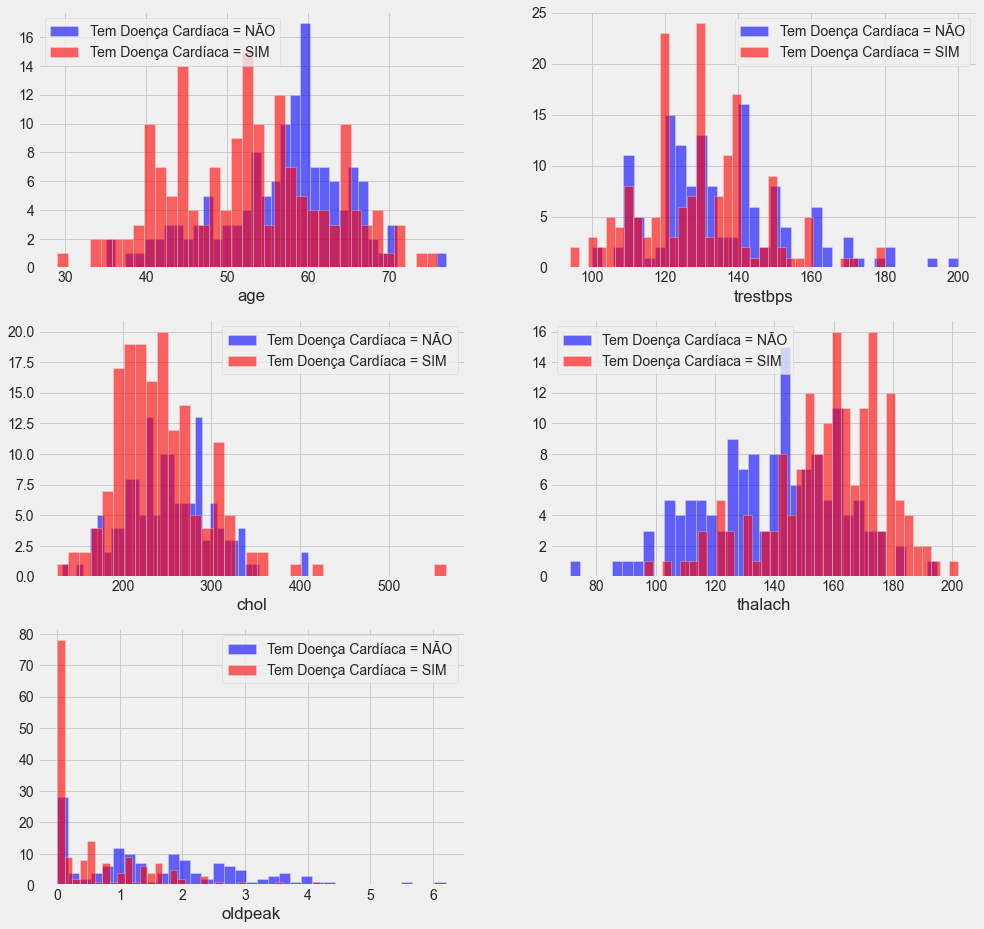

In [24]:
## plotar variavedis categoricas 
plt.figure(figsize=(15, 15))

for i, column in enumerate(continous_val, 1):
    plt.subplot(3, 2, i)
    df[df["target"] == 0][column].hist(bins=35, color='blue', label='Tem Doença Cardíaca = NÃO', alpha=0.6)
    df[df["target"] == 1][column].hist(bins=35, color='red', label='Tem Doença Cardíaca = SIM', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

#### Observações do gráfico acima:

- idade : pessoas entre 42 e 53 anos são mais propensas a ter doenças cardiacas

- trestbps: pressão arterial em repouso acima de 120 tem mais riscos de problemas cardiacos

- col: maior que 200 é preocupante.

- thalach: Pessoas com um máximo de mais de 145 são mais propensas a ter doenças cardíacas.

- Oldepeak (antigo pico) de depressão do segmento ST induzida pelo exercício versus repouso analisa o estresse cardíaco durante o exercício um coração não saudável se estressará mais.

### Matriz de correlção

(14.5, -0.5)

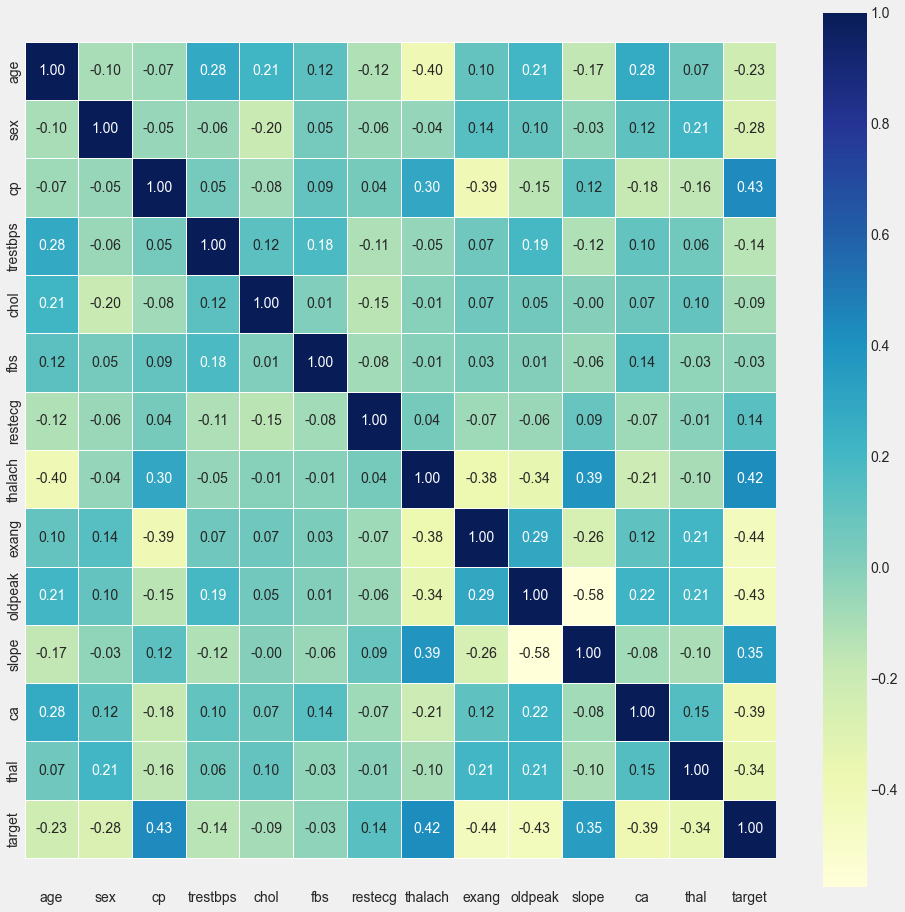

In [25]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 15))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

<AxesSubplot:title={'center':'correlação com target'}>

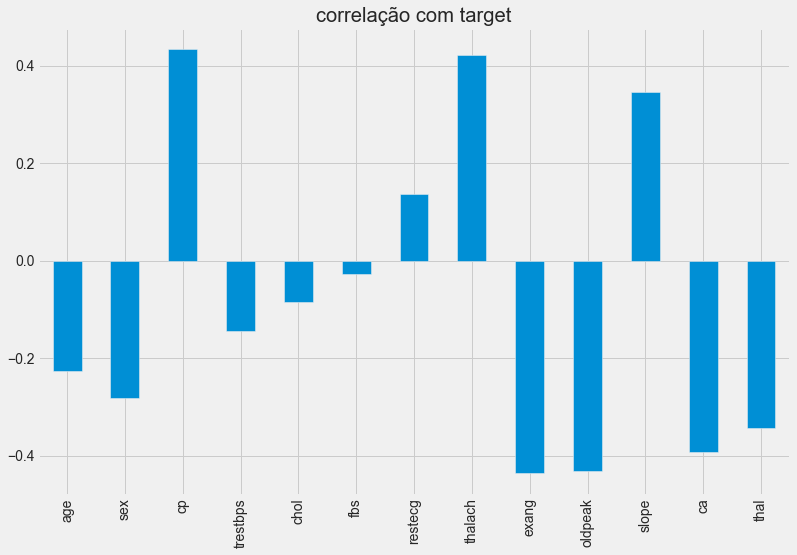

In [26]:
df.drop('target', axis=1).corrwith(df.target).plot(kind='bar', grid=True, figsize=(12,8), title="correlação com target")

#### Observção do gráfico acima
fbs e chol são as váriaveis com menos correlação com target, todas as outras tem uma correlação significativa.

## PROCESSAMENTO DE DADOS

#### Função auxiliar para imprimir o relatório de classificação do desempenho do modelo de aprendizado de máquina:

In [27]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

#### Eliminando as variáveis que tem pouca correlção e a variável de pesquisa

In [ ]:
 encoded= df

In [29]:
X = encoded.drop(['target','chol','fbs'],axis=1)
y = encoded.target

### Treino e teste

In [30]:


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)



### Feature Scaling

In [31]:

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#### Agora vamos treinar o modelo de aprendizado de máquina e imprimir o relatório de classificação do nosso modelo de LogisticRegression

In [32]:

from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(X_train, y_train)

print_score(lr_clf, X_train, y_train, X_test, y_test, train=True)
print_score(lr_clf, X_train, y_train, X_test, y_test, train=False)


Train Result:
Accuracy Score: 85.85%
_______________________________________________
CLASSIFICATION REPORT:
              0      1  accuracy  macro avg  weighted avg
precision  0.88   0.85      0.86       0.86          0.86
recall     0.80   0.90      0.86       0.85          0.86
f1-score   0.84   0.87      0.86       0.86          0.86
support   97.00 115.00      0.86     212.00        212.00
_______________________________________________
Confusion Matrix: 
 [[ 78  19]
 [ 11 104]]

Test Result:
Accuracy Score: 81.32%
_______________________________________________
CLASSIFICATION REPORT:
              0     1  accuracy  macro avg  weighted avg
precision  0.80  0.82      0.81       0.81          0.81
recall     0.78  0.84      0.81       0.81          0.81
f1-score   0.79  0.83      0.81       0.81          0.81
support   41.00 50.00      0.81      91.00         91.00
_______________________________________________
Confusion Matrix: 
 [[32  9]
 [ 8 42]]



In [33]:
test_score = accuracy_score(y_test, lr_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, lr_clf.predict(X_train)) * 100

results_df = pd.DataFrame(data=[["Logistic Regression", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,85.85,81.32


### Agora vamos treinar o modelo de SVM Support Vector Machine e imprimir o relatório de classificação.

In [126]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)


clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
from sklearn import metrics
#print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

clf = SVC(kernel = 'linear')
clf.fit(X_train, y_train)

print_score(clf, X_train, y_train, X_test, y_test, train=True)
print_score(clf, X_train, y_train, X_test, y_test, train=False)



Train Result:
Accuracy Score: 85.71%
_______________________________________________
CLASSIFICATION REPORT:
              0      1  accuracy  macro avg  weighted avg
precision  0.89   0.84      0.86       0.86          0.86
recall     0.78   0.92      0.86       0.85          0.86
f1-score   0.83   0.88      0.86       0.85          0.86
support   90.00 113.00      0.86     203.00        203.00
_______________________________________________
Confusion Matrix: 
 [[ 70  20]
 [  9 104]]

Test Result:
Accuracy Score: 82.00%
_______________________________________________
CLASSIFICATION REPORT:
              0     1  accuracy  macro avg  weighted avg
precision  0.84  0.80      0.82       0.82          0.82
recall     0.77  0.87      0.82       0.82          0.82
f1-score   0.80  0.83      0.82       0.82          0.82
support   48.00 52.00      0.82     100.00        100.00
_______________________________________________
Confusion Matrix: 
 [[37 11]
 [ 7 45]]



In [128]:
test_score = accuracy_score(y_test, clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, clf.predict(X_train)) * 100

results_df = pd.DataFrame(data=[["SVM Support Vector Machine", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,SVM Support Vector Machine,85.71,82.00


### LogisticRegression  e SVM

### Treino IA


In [81]:
log_svm = SVC()
log_svm.fit (X_train, y_train)


log_reg = LogisticRegression()
log_reg.fit (X_train, y_train)





LogisticRegression()

### Teste IA

In [82]:
## retirar e colocar metricas de avaliação normalizar os dados antes 

test_pred_log = log_reg.predict (X_test)
test_pred_svm = log_svm.predict(X_test)

r2_lin = metrics.r2_score (y_test, test_pred_svm)
rmse_lin = np.sqrt(metrics.mean_squared_error(y_test, test_pred_svm))

print(f"R² SVM Support Vector Machine: {r2_lin}")
print(f"RSME SVM Support Vector Machine: {rmse_lin}")

r2_lin = metrics.r2_score (y_test, test_pred_log)
rmse_lin = np.sqrt(metrics.mean_squared_error(y_test, test_pred_log))

print(f"R² Logistic Regression: {r2_lin}")
print(f"RSME Logistic Regression: {rmse_lin}")



R² SVM Support Vector Machine: 0.19871794871794857
RSME SVM Support Vector Machine: 0.4472135954999579
R² Logistic Regression: 0.3189102564102563
RSME Logistic Regression: 0.41231056256176607


### Resutado do Modelo  LogisticRegression  

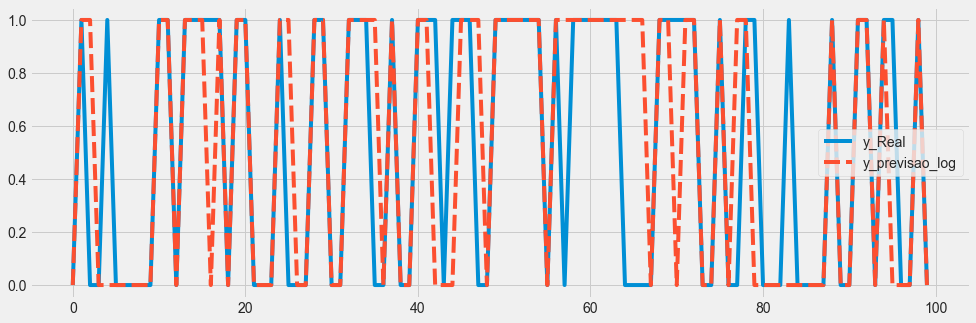

,y_Real,y_previsao_log
0,0,0
1,1,1
2,0,1
3,0,0
4,1,0
...,...,...
95,1,0
96,0,0
97,0,0
98,1,1


In [129]:
df_resultado = pd.DataFrame()
df_resultado['y_Real'] = y_test
df_resultado['y_previsao_log'] = test_pred_log
#df_resultado['y_previsao_svm'] = test_pred_svm


df_resultado = df_resultado.reset_index(drop=True)
fig = plt.figure(figsize=(15,5))
sns.lineplot(data=df_resultado)
plt.show()
display(df_resultado)



## RESULTADO DO MODELO DE SVM

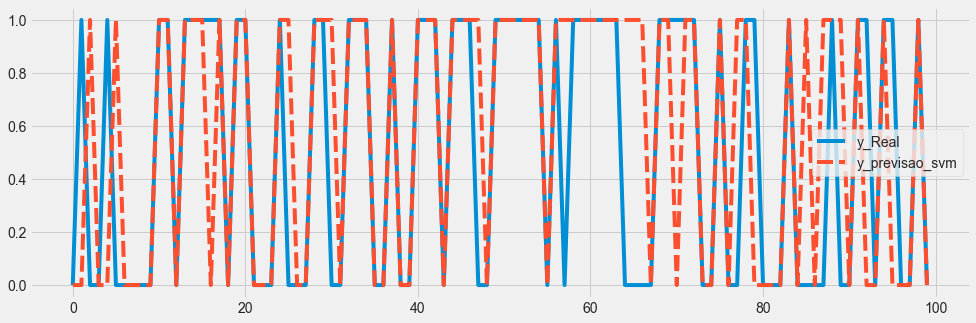

,y_Real,y_previsao_svm
0,0,0
1,1,0
2,0,1
3,0,0
4,1,0
...,...,...
95,1,0
96,0,0
97,0,0
98,1,1


In [130]:
df_resultado = pd.DataFrame()
df_resultado['y_Real'] = y_test
#df_resultado['y_previsao_log'] = test_pred_log
df_resultado['y_previsao_svm'] = test_pred_svm


df_resultado = df_resultado.reset_index(drop=True)
fig = plt.figure(figsize=(15,5))
sns.lineplot(data=df_resultado)
plt.show()
display(df_resultado)

## Analisando os modelos Logistic Regression e SVM
 Quanto maior o R², mais explicativo é o modelo , ou seja, melhor ele se ajusta à amostra.
 Quanto maior o RMSE, maior a diferença entre os valores previstos e observados, o que significa que pior um modelo se ajusta aos dados. Por outro lado, quanto menor o RMSE, melhor o modelo é capaz de ajustar os dados.
 - logo o nosso modelo Logistic Regression é melhor 

## Agora vamos testar uma Rede Neural para vê como se compara com os outros modelos

In [136]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)


In [137]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [138]:
classifier = Sequential()
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 11))

classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))

classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

classifier.fit(X_train, y_train, batch_size = 10, epochs = 100,verbose = 0)

score, acc = classifier.evaluate(X_train, y_train,
                            batch_size=10)
print('Train score:', score)
print('Train accuracy:', acc)

y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

print('*'*20)
score, acc = classifier.evaluate(X_test, y_test,
                            batch_size=10)
print('Test score:', score)
print('Test accuracy:', acc)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

21/21 [==============================] - 0s 1ms/step - loss: 0.2768 - accuracy: 0.9015
Train score: 0.27675512433052063
Train accuracy: 0.9014778137207031
4/4 [==============================] - 0s 2ms/step
********************
10/10 [==============================] - 0s 2ms/step - loss: 0.3964 - accuracy: 0.8600
Test score: 0.39635562896728516
Test accuracy: 0.8600000143051147


In [139]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.83      0.85        48
           1       0.85      0.88      0.87        52

    accuracy                           0.86       100
   macro avg       0.86      0.86      0.86       100
weighted avg       0.86      0.86      0.86       100



4/4 [==============================] - 0s 2ms/step


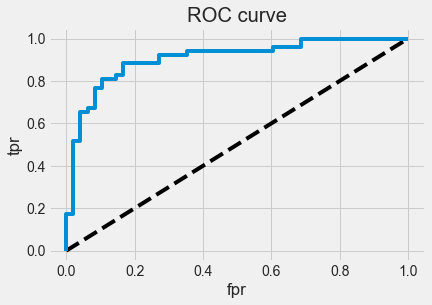

In [140]:
from sklearn.metrics import roc_curve
y_pred_proba = classifier.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show()

In [48]:
from sklearn.metrics import roc_auc_score
roc_auc_score( y_test,y_pred_proba)

0.8996394230769231

#### O modelo de rede Neural teve maior acertividade em relação aos outros.

## RELATÓRIO DO TRABALHO
- O nosso problema foi analisar os dados e implementar algoritmos de Marchine Learning para prever doenças cardíacas. Com base nos nossos dados notamos que tem aproximadamente 165 pessoas com problemas cardíacos e 140 pessoas sem problemas, a maioria do sexo masculino, pessoas com idade entre 42 e 53 anos são propensoas a ter problemas à partir dos 53 anos os batimentos cardíacos são mais elevados, pressão arterial acima de 120 é um risco. Para ter melhor acertividade, utilizamos modelo de logistRegression, SVM( Suport Vector Marchine) e rede Neural. No qual a rede Neural teve melhor Acuracy, com acertividade de 89%.  